# SLC FINAL EXAM

In [1]:
#important libraries
#importing the necessary packages
import pandas as pd
import string
#import plotly.express as px
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib.style

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.feature_selection import RFE
from scipy.stats import zscore
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,PowerTransformer
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,log_loss,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import plot_tree
from xgboost import XGBClassifier
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.model_selection import cross_val_score

warnings.filterwarnings(action="ignore")
%matplotlib inline


### DATA DESCRIPTION: 

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer. 

 RowNumber: Row Numbers from 1 to 10000 

 CustomerId: Unique Ids for bank customer identification 

 Surname: Customer's last name 

 CreditScore: Credit score of the customer 

 Geography: The country from which the customer belongs 

 Gender: Male or Female 

 Age: Age of the customer 

 Tenure: Number of years for which the customer has been with the bank 

 Balance: Bank balance of the customer 

 NumOfProducts: Number of bank products the customer is utilising 

 HasCrCard: Binary Flag for whether the customer holds a credit card with the bank or not 

 IsActiveMember: Binary Flag for whether the customer is an active member with the bank or not 

 EstimatedSalary: Estimated salary of the customer in Dollars 

 Exited: Binary flag 1 if the customer closed account with bank and 0 if the customer is retained 

 > Target Column Description: Exited is a class label used to divide into groups (customer closed account or not). 
 

### 1.	Read the dataset (tab, csv, xls, txt, inbuilt dataset)

In [2]:
# Kindly change the below cells from markdown to code and execute it 

In [3]:
import csv

with open("Churn_Modelling.csv","r")as file:
    
    reader=csv.reader(file)
    
df=pd.read_csv("Churn_Modelling.csv")

df.head(20)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


### 2.	Summarize important observations from the data set (5 Marks)

Some pointers which would help you, but don’t be limited by these

a.	Find out number of rows; no. & types of variables (continuous, categorical etc.)

b.	Calculate five-point summary for numerical variables

c.	Summarize observations for categorical variables – no. of categories, % observations in each category


In [4]:
df.shape

(10000, 14)

In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
#a)Let's extract all the categorical and the numerical columns for the further Analysis
df_categorical=df.select_dtypes(object)
df_numerical=df.select_dtypes(include=[np.number])

In [8]:
categorical_columns=df_categorical.columns
numerical_columns=df_numerical.columns

In [9]:
print("The number of categorical columns is: ",len(categorical_columns))
print("The columns are:",(categorical_columns))
print('.....................')
print("The number of numerical columns is: ",len(numerical_columns))
print("The columns are:",(numerical_columns))

The number of categorical columns is:  3
The columns are: Index(['Surname', 'Geography', 'Gender'], dtype='object')
.....................
The number of numerical columns is:  11
The columns are: Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [10]:
#b) five point summary
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
#c)print('% Values in each categorical columns in the dataset')
for k in categorical_columns:
    print('\n% Values in columns : ',k)
    print((df[k].value_counts()/len(df[k])*100))


% Values in columns :  Surname
Smith        0.32
Scott        0.29
Martin       0.29
Walker       0.28
Brown        0.26
             ... 
Dixon        0.01
Moffitt      0.01
Sneddon      0.01
Stanton      0.01
Priestley    0.01
Name: Surname, Length: 2932, dtype: float64

% Values in columns :  Geography
France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

% Values in columns :  Gender
Male      54.57
Female    45.43
Name: Gender, dtype: float64


In [12]:
# Drop the columns as explained above
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### 3.	Check for defects in the data. Perform necessary actions to ‘fix’ these defects (5 Marks)

Some pointers which would help you, but don’t be limited by these

a.	Do variables have missing/null values?

b.	Do variables have outliers?

c.	Is the Target distributed evenly? Is it a defect? If Yes, what steps are being taken to rectify the problem. 


In [14]:
#3a)
#lets check for missing values
missing_value=df.isna().sum().sort_values(ascending=False)
percentage_missing=(df.isna().sum()*100/df.isna().count()).sort_values(ascending=False)
missing_data=pd.concat([missing_value,percentage_missing],axis=1,keys=['Total','percentage of misssing values'])
missing_data

,Total,percentage of misssing values
Exited,0,0.0
EstimatedSalary,0,0.0
IsActiveMember,0,0.0
HasCrCard,0,0.0
NumOfProducts,0,0.0
Balance,0,0.0
Tenure,0,0.0
Age,0,0.0
Gender,0,0.0
Geography,0,0.0


In [15]:
df_numerical=df.select_dtypes(include=[np.number])
df_numerical.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [16]:
#3b)
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

#c)
plt.figure(figsize=(30,20))
s=1
for p in numerical_columns:
    plt.subplot(4,3,s)
    sns.distplot(df_numerical[p])
    s+=1

In [17]:
#treating the outlier
pt=PowerTransformer()
data_num=pd.DataFrame(pt.fit_transform(df_numerical),columns=df_numerical.columns)
data_num.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.335450,0.451286,-1.027104,-1.324054,-0.968357,0.646092,0.970243,0.118750,1.977165
1,-0.448602,0.359732,-1.447834,0.632125,-0.968357,-1.547768,0.970243,0.298155,-0.505775
2,-1.524793,0.451286,1.016561,0.870229,1.820493,0.646092,-1.030670,0.320049,1.977165
3,0.495043,0.168117,-1.447834,-1.324054,0.936715,-1.547768,-1.030670,-0.005022,-0.505775
4,2.095417,0.540200,-1.027104,0.778700,-0.968357,0.646092,0.970243,-0.256295,-0.505775


plt.figure(figsize=(30,20))
s=1
for p in data_num:
    plt.subplot(4,3,s)
    sns.distplot(data_num[p])
    s+=1

### 4.	Summarize relationships among variables (10 marks)               
a.	Plot relevant categorical plots. Find out which are the variables most correlated or appear to be in causation with Target? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?


b.	Plot all independent variables with the target & find out the relationship? Perform the Relevant Tests to find out if the Independent variables are associated with the Target Variable.

 Hint: based on your observations you may want to transform features or create additional features.


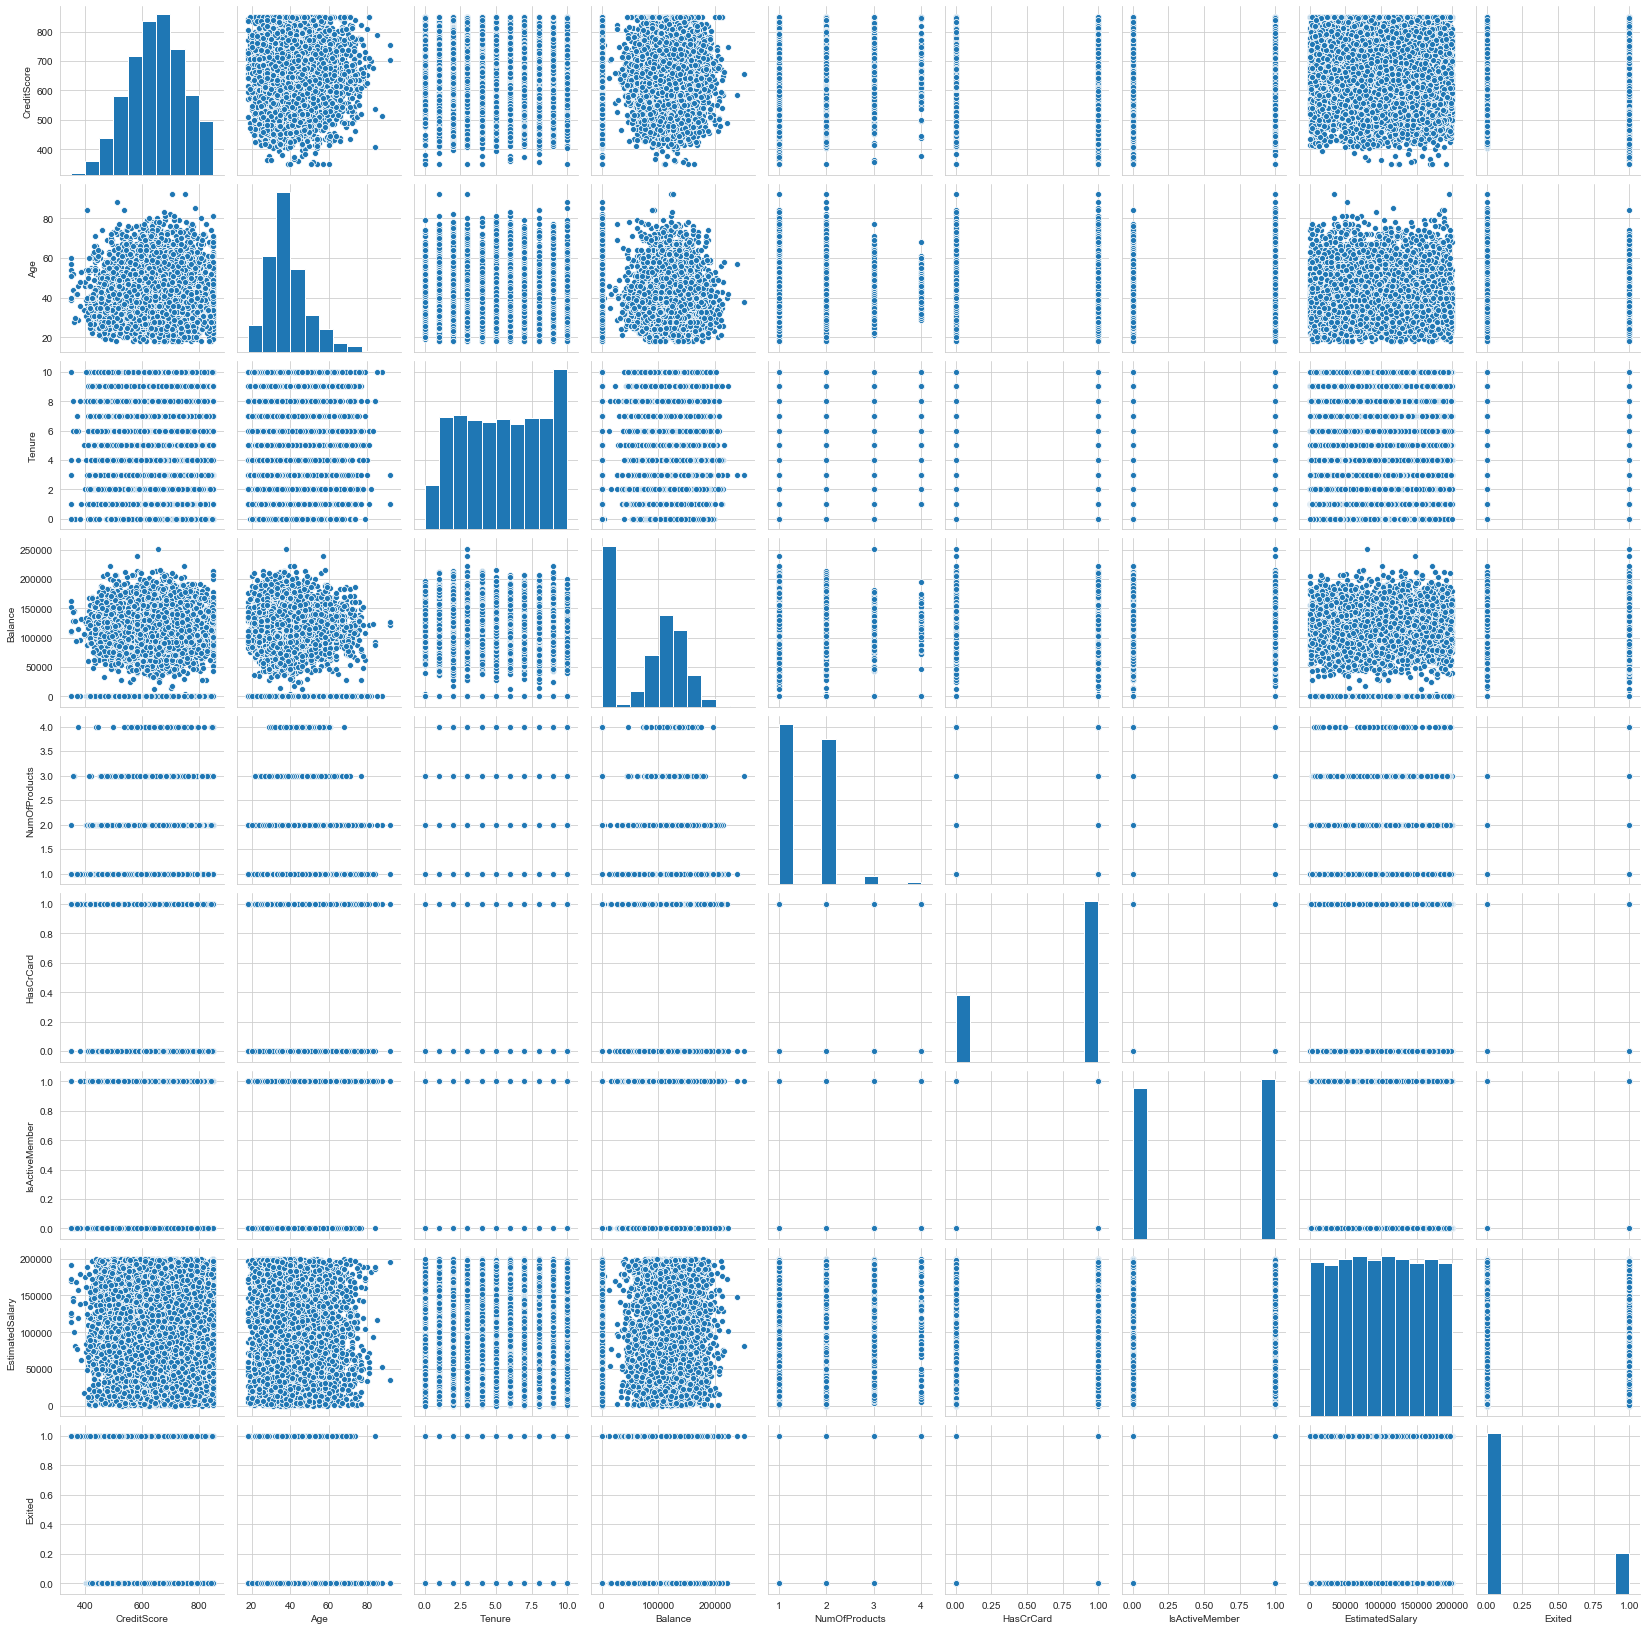

In [18]:
#4a)
sns.set_style('whitegrid')
sns.pairplot(data=df)

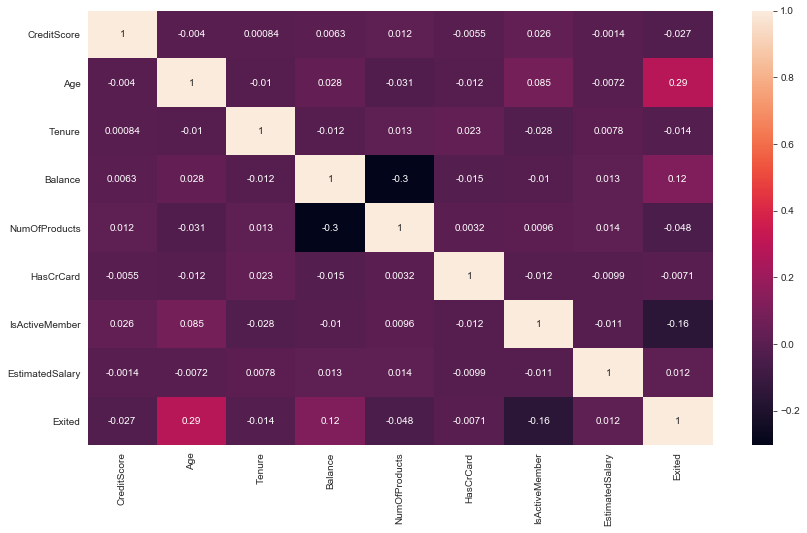

In [19]:
# 2b. highly correlated

plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True)

In [18]:
#we find the milticollineatity
X=df_numerical

In [19]:
vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data['vif']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,feature,vif
0,CreditScore,20.690979
1,Age,13.606988
2,Tenure,3.866685
3,Balance,2.651487
4,NumOfProducts,7.705552
5,HasCrCard,3.286672
6,IsActiveMember,2.150729
7,EstimatedSalary,3.885184
8,Exited,1.435330


In [20]:
for i in range(len(X.columns)):
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['Features']=X.columns
    multi=vif[vif['VIF Factor']>10]
    if (multi.empty==False):
        df_numerical_sorted=multi.sort_values(by='VIF Factor',ascending=False)
    else:
        print(vif)
        break
    if (df_numerical_sorted.empty==False):
        X=X.drop(df_numerical_sorted['Features'].iloc[0],axis=1)
    else:
        print(vif)

   VIF Factor         Features
0    3.481944           Tenure
1    2.254423          Balance
2    4.925817    NumOfProducts
3    3.021991        HasCrCard
4    1.981699   IsActiveMember
5    3.521361  EstimatedSalary
6    1.285375           Exited


In [27]:
gender= pd.crosstab(df['Exited'],df['Gender'])
gender

Gender,Female,Male
Exited,,
0,3404,4559
1,1139,898


In [28]:
#Observed Values
Observed_Values = gender.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[3404 4559]
 [1139  898]]


In [30]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
alpha=0.05
chiVal,pVal,df,exp=chi2_contingency(gender)
chiVal,pVal,df,exp


(112.91857062096116,
 2.2482100097131755e-26,
 1,
 array([[3617.5909, 4345.4091],
        [ 925.4091, 1111.5909]]))

In [31]:
print("chi-square statistic:-",chiVal)
critical_value=chi2.ppf(q=1-alpha,df=df)
print('critical_value:',critical_value)
print('p_value:',pVal)
print('Degree of Freedom: ',df)
print('expected_value: ',exp)

## NOTES:
 #if p_value is less the 0.05 we reject the null hypothesis.
 
 #if the chi_square is greater than critical value we reject the null hypothesis.

chi-square statistic:- 112.91857062096116
critical_value: 3.841458820694124
p_value: 2.2482100097131755e-26
Degree of Freedom:  1
expected_value:  [[3617.5909 4345.4091]
 [ 925.4091 1111.5909]]


In [32]:
if chiVal>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if pVal<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [33]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare


import scipy.stats
import statsmodels.stats.multicomp as mc


The null and alternative hypothesis is:

H<sub>0</sub>: The two populations are equal for variable creditscore.

H<sub>1</sub>: The two populations are not equal for variable creditscore.

In [34]:
#### Mann Whitney U Test for variable age and Target variable (y).

#scipy.stats.mannwhitneyu(x=df[['CreditScore']], y=df[['Exited']], use_continuity=True, alternative='two-sided')

### 5.	Split dataset into train and test (70:30) (5 marks)
a.	Are both train and test representative of the overall data? How would you ascertain this statistically?


In [42]:
df_cat = df.select_dtypes(exclude = [np.number])

# display categorical features
df_cat.columns

Index(['Geography', 'Gender'], dtype='object')

In [43]:
df_num = df.select_dtypes(include = [np.number])

# display categorical features
df_num.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [44]:
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

In [45]:
df_final = pd.concat([df_num, dummy_var], axis = 1)

# display first five observations
df_final.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [46]:
df.shape

(10000, 11)

In [47]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [48]:
df_final = df_final.apply(lambda x: object_to_int(x))
df_final.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [49]:
# Dependent variables:
X=data_num

# Target variable:
y=df[['Exited']].reset_index(drop=True)

In [58]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define data
data =df_numerical.values
print(data)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[6.1900000e+02 4.2000000e+01 2.0000000e+00 ... 1.0000000e+00
  1.0134888e+05 1.0000000e+00]
 [6.0800000e+02 4.1000000e+01 1.0000000e+00 ... 1.0000000e+00
  1.1254258e+05 0.0000000e+00]
 [5.0200000e+02 4.2000000e+01 8.0000000e+00 ... 0.0000000e+00
  1.1393157e+05 1.0000000e+00]
 ...
 [7.0900000e+02 3.6000000e+01 7.0000000e+00 ... 1.0000000e+00
  4.2085580e+04 1.0000000e+00]
 [7.7200000e+02 4.2000000e+01 3.0000000e+00 ... 0.0000000e+00
  9.2888520e+04 1.0000000e+00]
 [7.9200000e+02 2.8000000e+01 4.0000000e+00 ... 0.0000000e+00
  3.8190780e+04 0.0000000e+00]]
[[0.538      0.32432432 0.2        ... 1.         0.50673489 1.        ]
 [0.516      0.31081081 0.1        ... 1.         0.56270874 0.        ]
 [0.304      0.32432432 0.8        ... 0.         0.56965435 1.        ]
 ...
 [0.718      0.24324324 0.7        ... 1.         0.21039009 1.        ]
 [0.844      0.32432432 0.3        ... 0.         0.46442905 1.        ]
 [0.884      0.13513514 0.4        ... 0.         0.19091423 0.   

In [59]:
import statsmodels.api as sm
rc=10
X=sm.add_constant(X)   # Initialising the random state at 10.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=rc)


In [60]:
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (7000, 9)
Input Test: (3000, 9)
Output Training: (7000,)
Output Test: (3000,)


In [61]:
# using statsmodels:
X_train_const=sm.add_constant(X_train)
logit_model=sm.Logit(y_train,X_train_const).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.436311
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6991
Method:                           MLE   Df Model:                            8
Date:                Sat, 10 Sep 2022   Pseudo R-squ.:                  0.1339
Time:                        14:01:45   Log-Likelihood:                -3054.2
converged:                       True   LL-Null:                       -3526.3
Covariance Type:            nonrobust   LLR p-value:                1.685e-198
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0309      0.287    -14.062      0.000      -4.593      -3.469
x1            -0.0006      0.000     -1.670      0.095      -0.001    9.56e-05
x2             0.0736      0.003     24.356      0.000       0.068       0.079
x3            -0.0107      0.011     -0.953      0.340      -0.033       0.011
x4          5.354e-06   5.48e-07      9.770      0.000    4.28e-06    6.43e-06
x5             0.0193      0.055      0.354      0.724      -0.088       0.126
x6            -0.0171      0.070     -0.244      0.808      -0.155       0.121
x7            -1.1136      0.069    -16.215      0.000      -1.248      -0.979
x8          9.865e-07   5.61e-07      1.757      0.079   -1.14e-07    2.09e-06
==============================================================================
"""

In [57]:
# using statsmodels:
# evaluate knn on the raw sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
# load dataset
data = df_numerical.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.761 (0.010)


In [67]:
#significance feature affecting the model
#if the p value is less than 0.05 we are considering the feature to be significant

significant=logit_model.pvalues[logit_model.pvalues<0.05]
significant_features=pd.DataFrame(data=significant,columns=['p-value'])
significant_features

,p-value
0,6.458881e-45
1,4.973501e-131
2,1.522005e-22
3,3.976332e-59


### 6.	Fit a base model and explain the reason of selecting that model. Please write your key observations (15 marks) 

a.	What is the overall Accuracy? Please comment on whether it is good or not. 

b.	What is Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement.

c.	Which variables are significant?

d.	What is Cohen’s Kappa Value and what inference do you make from the model
e.	Which other key model output parameters do you want to look at? 


In [68]:
accuracy=logit_model.prsquared
print('Logit model accuracy : ',accuracy)

Logit model accuracy :  0.13387462129104477


In [69]:
# Initializing the probability threshold:
th=0.5
ypred_prob=logit_model.predict(X_test)
ypred=[0 if p<th else 1 for p in ypred_prob]

# Computing the Confusion matrix:
confusion_mat=confusion_matrix(y_test,ypred)
tn = confusion_mat[0,0]
tp = confusion_mat[1,1]
fp = confusion_mat[0,1]
fn = confusion_mat[1,0]
print('Confusion Matrix for Logit Model : ')
print('---------------------------------','\n')
print(confusion_mat)

Confusion Matrix for Logit Model : 
--------------------------------- 

[[2318   62]
 [ 525   95]]


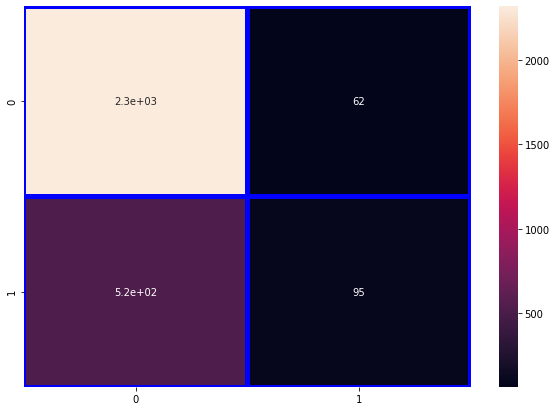

In [70]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_mat,annot=True,linewidth=3.5,linecolor='blue')
plt.show()

In [71]:
# Computing the True Positive rate(TPR),False Positive rate(FPR) and probability threshold:
fpr, tpr, th= roc_curve(y_test, ypred_prob)

# Creating a Dataframe of the data:
youden= pd.DataFrame({'TPR': tpr,
                       'FPR': fpr,
                        'thres':th})

# Calculating the Younden's index:
youden['YI']= youden.TPR-youden.FPR
youden= youden.sort_values(by='YI',ascending=False).reset_index(drop=True)
print(youden.head(5))
print('-----------------------------------------','\n')
# or
print('Optimal threshold for probability: ',round(youden['YI'].max(),2))

        TPR       FPR     thres        YI
0  0.609677  0.268908  0.228744  0.340770
1  0.591935  0.251261  0.237415  0.340675
2  0.608065  0.268067  0.229234  0.339997
3  0.611290  0.271429  0.227904  0.339862
4  0.608065  0.268908  0.228943  0.339157
----------------------------------------- 

Optimal threshold for probability:  0.34


In [72]:
# Computing the classification report:

logit_classification=classification_report(y_test,ypred)
print('Logit model classification report: ')
print('------------------------------------','\n')
print(logit_classification)

Logit model classification report: 
------------------------------------ 

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2380
           1       0.61      0.15      0.24       620

    accuracy                           0.80      3000
   macro avg       0.71      0.56      0.57      3000
weighted avg       0.77      0.80      0.75      3000



### 7.	How do you improve overall efficiency of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model. (20 marks)
Please feel free to have any number of iterations to get to the final answer. Marks are awarded based on the quality of final model you are able to achieve. 


Checking % of subcatgories in the Target variable(Exited):  

% of Positive class(1) : 
20.369999999999997 

% of Negative class(0) : 
79.63


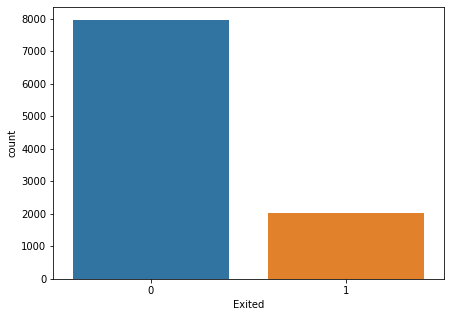

In [82]:
print('Checking % of subcatgories in the Target variable(Exited): ','\n')
print('% of Positive class(1) : ',)
print((df['Exited'].value_counts()[1]/df['Exited'].shape[0])*100,'\n')
print('% of Negative class(0) : ',)
print((df['Exited'].value_counts()[0]/df['Exited'].shape[0])*100)
plt.figure(figsize=(7,5))
sns.countplot(df['Exited'])

In [93]:
# Performing SMOTE to reduce imbalance:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
smote=SMOTE(sampling_strategy=0.95,random_state=10)
X_res, y_res = smote.fit_resample(X,y)
print('Resampled X :',X_res.shape)
print('Resampled y :',y_res.shape,'\n')


# Splitting the dataset into train and test in the ratio 80:20
rs=10
XRes_train,XRes_test,yRes_train,yRes_test=train_test_split(X_res,y_res,test_size=0.2,random_state=rs)
print('XRes_train :',XRes_train.shape)
print('yRes_train :',yRes_train.shape)
print('XRes_test :',XRes_test.shape)
print('yRes_test :',yRes_test.shape)

Resampled X : (15527, 9)
Resampled y : (15527,) 

XRes_train : (12421, 9)
yRes_train : (12421,)
XRes_test : (3106, 9)
yRes_test : (3106,)


In [94]:
#tuning the logistic model
tune_params=[{'penalty':['l1','l2','elasticnet'],'max_iter':[100, 110, 120, 150, 180, 200],
             }]
k=KFold(n_splits=10,shuffle=True, random_state=10)
grid_dt=GridSearchCV(estimator=LogisticRegression(),
                     param_grid=tune_params,cv=k,scoring='recall')
grid_model=grid_dt.fit(X_train,y_train)
grid_model.best_params_



{'max_iter': 100, 'penalty': 'l2'}

In [95]:
#tuning the decison model
tune_params=[{'criterion':['entropy', 'gini'],'splitter':['best','random'],
 'max_depth': np.arange(0, 200, 10),
 'min_samples_split':[2, 5, 8, 10, 20]}]
k=KFold(n_splits=10,shuffle=True, random_state=10)
grid_dt=GridSearchCV(estimator=DecisionTreeClassifier(),
                     param_grid=tune_params,cv=k,scoring='recall')
grid_model=grid_dt.fit(X_train,y_train)
grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 160,
 'min_samples_split': 2,
 'splitter': 'random'}

In [96]:
# tuning the knn model
tune_params=[{'n_neighbors':[5,6,7,8],'weights':['uniform','distance'],
 'algorithm':['auto'],
 'leaf_size':np.arange(30, 50, 10)}]
k=KFold(n_splits=10,shuffle=True, random_state=10)
grid_dt=GridSearchCV(estimator=KNeighborsClassifier(),
                     param_grid=tune_params,cv=k,scoring='recall')
grid_model=grid_dt.fit(X_train,y_train)
grid_model.best_params_

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 5, 'weights': 'distance'}

In [ ]:
#tunning the random forest
tune_params=[{'criterion':['entropy', 'gini'],
    'n_estimators': [100,200,400,800,1200,1400],'random_state':[10],
 'max_depth': np.arange(0, 200, 10),'min_samples_leaf': [5, 10, 20, 30],
 'min_samples_split':[5, 10, 15, 20]}]
k=KFold(n_splits=10,shuffle=True, random_state=10)
grid_dt=GridSearchCV(estimator=RandomForestClassifier(),
                     param_grid=tune_params,cv=k,scoring='recall')
grid_model=grid_dt.fit(X_train,y_train)
grid_model.best_params_

Overall accuracy of LogisticRegression() for resampled train data :  79.0
Overall accuracy of LogisticRegression() for resampled test data :  79.0 

Confusion Matrix for LogisticRegression() Model : 
[[2324   56]
 [ 588   32]] 

Sensitivity :  5.16
Specificity :  97.65 

Classification report of LogisticRegression() for resampled train data : 
------------------------------------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      5583
           1       0.41      0.06      0.10      1417

    accuracy                           0.79      7000
   macro avg       0.61      0.52      0.49      7000
weighted avg       0.72      0.79      0.73      7000
 

Classification report of LogisticRegression() for resampled test data : 
------------------------------------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.80      0.98

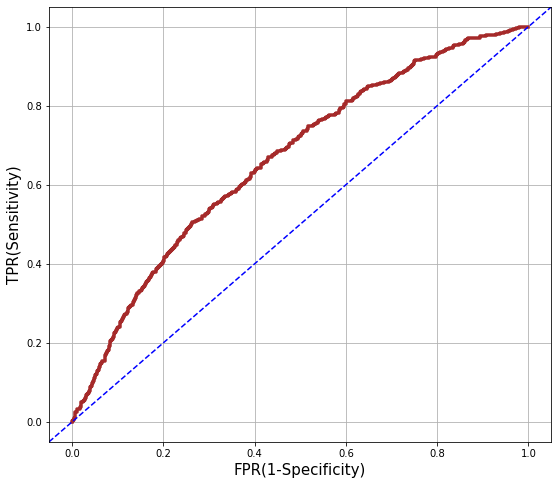

AUC Score of LogisticRegression() for resampled test data : 
0.6634819734345351 

The Cross Entropy score of LogisticRegression() Model :  7.414338925259522 

Mean Score :  0.7925714285714287
Bias error :  20.74285714285713
Variance error :  1.6633413114721465 

---------------------------------------------------------------------------------------------------------------------------- 

Overall accuracy of DecisionTreeClassifier(max_depth=160, splitter='random') for resampled train data :  100.0
Overall accuracy of DecisionTreeClassifier(max_depth=160, splitter='random') for resampled test data :  78.0 

Confusion Matrix for DecisionTreeClassifier(max_depth=160, splitter='random') Model : 
[[2050  330]
 [ 317  303]] 

Sensitivity :  48.87
Specificity :  86.13 

Classification report of DecisionTreeClassifier(max_depth=160, splitter='random') for resampled train data : 
------------------------------------------------------------------------------- 

              precision    recall  f

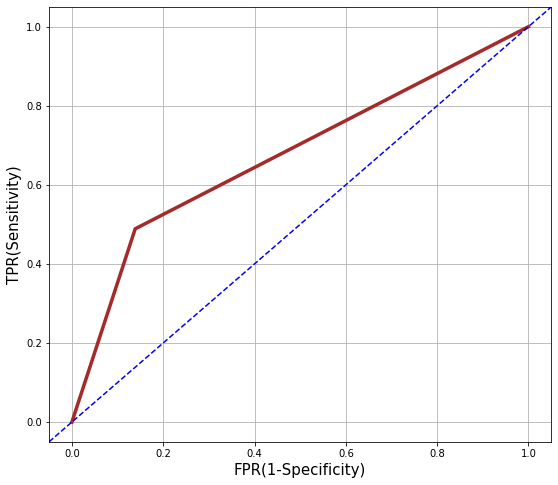

AUC Score of DecisionTreeClassifier(max_depth=160, splitter='random') for resampled test data : 
0.6750271076172405 

The Cross Entropy score of DecisionTreeClassifier(max_depth=160, splitter='random') Model :  7.44895073155306 

Mean Score :  0.7838571428571427
Bias error :  21.61428571428573
Variance error :  1.9848408645713351 

---------------------------------------------------------------------------------------------------------------------------- 

Overall accuracy of KNeighborsClassifier(weights='distance') for resampled train data :  100.0
Overall accuracy of KNeighborsClassifier(weights='distance') for resampled test data :  74.0 

Confusion Matrix for KNeighborsClassifier(weights='distance') Model : 
[[2143  237]
 [ 549   71]] 

Sensitivity :  11.45
Specificity :  90.04 

Classification report of KNeighborsClassifier(weights='distance') for resampled train data : 
------------------------------------------------------------------------------- 

              precision    re

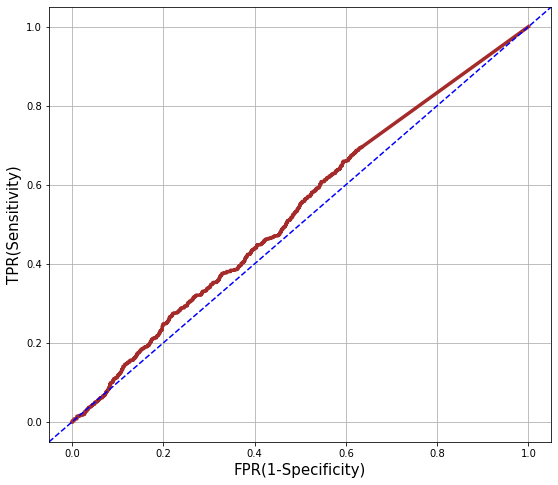

AUC Score of KNeighborsClassifier(weights='distance') for resampled test data : 
0.5331133098400651 

The Cross Entropy score of KNeighborsClassifier(weights='distance') Model :  9.049222583663584 

Mean Score :  0.7461428571428572
Bias error :  25.38571428571428
Variance error :  1.4856424073954686 

---------------------------------------------------------------------------------------------------------------------------- 

Overall accuracy of GaussianNB() for resampled train data :  79.0
Overall accuracy of GaussianNB() for resampled test data :  78.0 

Confusion Matrix for GaussianNB() Model : 
[[2296   84]
 [ 581   39]] 

Sensitivity :  6.29
Specificity :  96.47 

Classification report of GaussianNB() for resampled train data : 
------------------------------------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      5583
           1       0.37      0.08      0.13      1417

    accura

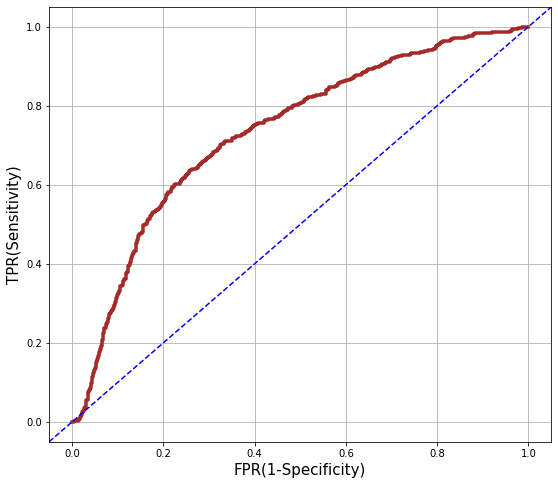

AUC Score of GaussianNB() for resampled test data : 
0.7325792897804283 

The Cross Entropy score of GaussianNB() Model :  7.656117822933246 

Mean Score :  0.7851428571428573
Bias error :  21.485714285714273
Variance error :  1.5507478713728169 

---------------------------------------------------------------------------------------------------------------------------- 

Overall accuracy of RandomForestClassifier() for resampled train data :  100.0
Overall accuracy of RandomForestClassifier() for resampled test data :  85.0 

Confusion Matrix for RandomForestClassifier() Model : 
[[2294   86]
 [ 353  267]] 

Sensitivity :  43.06
Specificity :  96.39 

Classification report of RandomForestClassifier() for resampled train data : 
------------------------------------------------------------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5583
           1       1.00      1.00      1.00      1417

    accuracy   

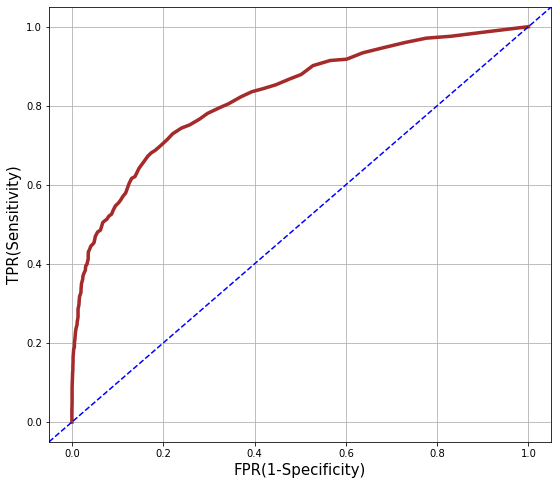

AUC Score of RandomForestClassifier() for resampled test data : 
0.8255875576036866 

The Cross Entropy score of RandomForestClassifier() Model :  5.054197200914929 

Mean Score :  0.8537142857142858
Bias error :  14.628571428571425
Variance error :  1.883106411865489 

---------------------------------------------------------------------------------------------------------------------------- 



In [99]:
def tunned_basemodels(model):
    for j in model:
        plt.figure(figsize=(9,8))
        Tuned_base_model=j.fit(X_train,y_train)
        ypred_train=Tuned_base_model.predict(X_train)
        ypred_test=Tuned_base_model.predict(X_test)
        ypred_test_prob=Tuned_base_model.predict_proba(X_test)
        print(f'Overall accuracy of {j} for resampled train data : ',
        np.round(accuracy_score(y_train,ypred_train),2)*100)
        print(f'Overall accuracy of {j} for resampled test data : ',
        np.round(accuracy_score(y_test,ypred_test),2)*100,'\n')
        confusion_mat=confusion_matrix(y_test,ypred_test)
        tn = confusion_mat[0,0]
        tp = confusion_mat[1,1]
        fp = confusion_mat[0,1]
        fn = confusion_mat[1,0]
        print(f'Confusion Matrix for {j} Model : ')
        print(confusion_mat,'\n')
        Sensitivity=((tp/(tp+fn))*100)
        print('Sensitivity : ',np.round(Sensitivity,2))
        Specificity=((tn/(tn+fp))*100)
        print('Specificity : ',np.round(Specificity,2),'\n')
        print(f'Classification report of {j} for resampled train data : ')
        print('-------------------------------------------------------------------------------','\n')
        print(classification_report(y_train,ypred_train),'\n')
        print(f'Classification report of {j} for resampled test data : ')
        print('-------------------------------------------------------------------------------','\n')
        print(classification_report(y_test,ypred_test),'\n')
        fpr,trp,th=roc_curve(y_test,ypred_test_prob[:,1])
        plt.plot(fpr,trp,color='brown',linewidth=3.5)
        plt.xlim([-0.05,1.05])
        plt.ylim([-0.05,1.05])
        plt.grid()
        plt.xlabel('FPR(1-Specificity)',fontsize=15)
        plt.ylabel('TPR(Sensitivity)',fontsize=15)
        plt.plot([-0.05,1.05],[-0.05,1.05],'--b')
        plt.show()
        print(f'AUC Score of {j} for resampled test data : ')
        print(roc_auc_score(y_test,ypred_test_prob[:,1]),'\n')
        cross_entropy=log_loss(y_test,ypred_test)
        print(f'The Cross Entropy score of {j} Model : ',cross_entropy,'\n')
        k=KFold(n_splits=10,shuffle=True, random_state=10)
        scores=cross_val_score(estimator=j,X=X_train,y=y_train,cv=k,scoring='accuracy')
        print("Mean Score : ",np.mean(scores))
        print("Bias error : ",(1-np.mean(scores))*100)
        print("Variance error : ",(np.std(scores)/np.mean(scores))*100,'\n')
        print('----------------------------------------------------------------------------------------------------------------------------','\n')
models=[LogisticRegression(max_iter=100,penalty='l2'),DecisionTreeClassifier(criterion='gini',
 max_depth=160,min_samples_split=2,splitter='random'),
        KNeighborsClassifier(algorithm='auto',leaf_size=30,n_neighbors=5,weights='distance'),
        GaussianNB(),RandomForestClassifier()]
tunned_basemodels(models)

In [ ]:
rfe=RFE(estimator=RandomForestClassifier(),n_features_to_select=None,step=1,verbose=0)
rfe_model=rfe.fit(XRes_train,yRes_train)
features_imp=pd.DataFrame({'Features':X_res.columns,
                           'Rank':rfe_model.ranking_}).sort_values(by='Rank',ascending=True)
print(features_imp[features_imp['Rank']==1],'\n')
XRes_new=features_imp[features_imp['Rank']==1]
print(list(XRes_new['Features']))

In [ ]:
def XGBoostModel(fin_model):
        X_new=X[['']]
        Y=df['Exited']
        smt=SMOTE(sampling_strategy=0.95,random_state=10)
        Xnew_res, Y_res = smt.fit_resample(X_new,Y)
        XRes_train,XRes_test,YRes_train,YRes_test=train_test_split(Xnew_res,Y_res,test_size=0.2,random_state=10)
        plt.figure(figsize=(10,9))
        Res_model=fin_model.fit(XRes_train,YRes_train)
        YRespred_train=Res_model.predict(XRes_train)
        YRespred_test=Res_model.predict(XRes_test)
        YRespred_test_prob=Res_model.predict_proba(XRes_test)
        print('Overall accuracy of XGBoost Model for resampled train data : ',
        np.round(accuracy_score(YRes_train,YRespred_train),2)*100)
        print('Overall accuracy of XGBoost Model for resampled test data : ',
        np.round(accuracy_score(YRes_test,YRespred_test),2)*100,'\n')
        confusion_mat=confusion_matrix(YRes_test,YRespred_test)
        tn = confusion_mat[0,0]
        tp = confusion_mat[1,1]
        fp = confusion_mat[0,1]
        fn = confusion_mat[1,0]
        print('Confusion Matrix for XGBoost Model Model : ')
        print(confusion_mat,'\n')
        Sensitivity=((tp/(tp+fn))*100)
        print('Sensitivity : ',np.round(Sensitivity,2))
        Specificity=((tn/(tn+fp))*100)
        print('Specificity : ',np.round(Specificity,2),'\n')
        print('Classification report of XGBoost Model for resampled train data : ')
        print('-------------------------------------------------------------------------------','\n')
        print(classification_report(YRes_train,YRespred_train),'\n')
        print('Classification report of XGBoost Model for resampled test data : ')
        print('----------------------------------------------------------------','\n')
        print(classification_report(YRes_test,YRespred_test),'\n')
        fpr,trp,th=roc_curve(YRes_test,YRespred_test_prob[:,1])
        plt.plot(fpr,trp,color='orange',linewidth=6.5)
        plt.xlim([-0.05,1.05])
        plt.ylim([-0.05,1.05])
        plt.grid()
        plt.title('ROC Curve for XGBoost Model',fontsize=15)
        plt.xlabel('FPR(1-Specificity)',fontsize=15)
        plt.ylabel('TPR(Sensitivity)',fontsize=15)
        plt.plot([-0.05,1.05],[-0.05,1.05],'--r',linewidth=4.5)
        plt.show()
        print('AUC Score for XGBoost Model for resampled test data : ')
        print(roc_auc_score(YRes_test,YRespred_test_prob[:,1]),'\n')
        cross_entropy=log_loss(YRes_test,YRespred_test)
        print('The Cross Entropy score of XGBoost Model : ',cross_entropy,'\n')
        k=KFold(n_splits=10,shuffle=True, random_state=10)
        scores=cross_val_score(estimator=fin_model,X=XRes_train,y=YRes_train,cv=k,scoring='accuracy')
        print("Mean Score : ",np.mean(scores))
        print("Bias error : ",(1-np.mean(scores))*100)
        print("Variance error : ",(np.std(scores)/np.mean(scores))*100,'\n')
        print('----------------------------------------------------------------------------------------------------------------------------','\n')
fin_model=XGBClassifier(eval_metric='logloss')
BankPrediction_XGBoostModel(fin_model)

### 8.	Summarize as follows (10 marks) 

1.	Summarize the overall fit of the model and list down the measures to prove that it is a good model

2.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.

3.	What changes from the base model had the most effect on model performance?

4.	What are the key risks to your results and interpretation?
